<a href="https://colab.research.google.com/github/ryanditata/machineLearning/blob/main/KNN_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mengimpor library yang dibutuhkan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Memuat dataset

In [ ]:
dataset = pd.read_csv('dataset_diabetes.csv')
X = dataset[['HbA1c_level', 'blood_glucose_level']].values
y = dataset['diabetes'].values

Menampilkan isi fitur X

In [ ]:
X

array([[  6.6, 140. ],
       [  6.6,  80. ],
       [  5.7, 158. ],
       ...,
       [  5.7, 155. ],
       [  4. , 100. ],
       [  6.6,  90. ]])

Membagi data
75% untuk pelatihan, 25% untuk pengujian.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Menampilkan data latih X_train

In [ ]:
X_train

array([[  5.7, 160. ],
       [  4. , 145. ],
       [  4.8, 145. ],
       ...,
       [  6.2, 140. ],
       [  6.6, 140. ],
       [  5. ,  80. ]])

Melakukan standarisasi data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Menampilkan hasil normalisasi X_train

In [ ]:
X_train

array([[ 0.1547507 ,  0.53292466],
       [-1.42840478,  0.16603378],
       [-0.68339044,  0.16603378],
       ...,
       [ 0.62038466,  0.04373682],
       [ 0.99289183,  0.04373682],
       [-0.49713685, -1.42382669]])

Membuat model KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'manhattan', p = 1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, p=1)

Melakukan prediksi terhadap data uji

In [ ]:
y_pred = classifier.predict(X_test)

Menampilkan hasil prediksi (y_pred) dan label sebenarnya (y_test) untuk dibandingkan

In [ ]:
print(y_pred)
print(y_test)

[0 1 0 ... 0 0 0]
[0 1 0 ... 0 0 0]


Menghitung dan menampilkan confusion matrix untuk evaluasi model

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[21989     0]
 [  673  1375]]


Membuat heatmap dari confusion matrix untuk visualisasi yang lebih jelas

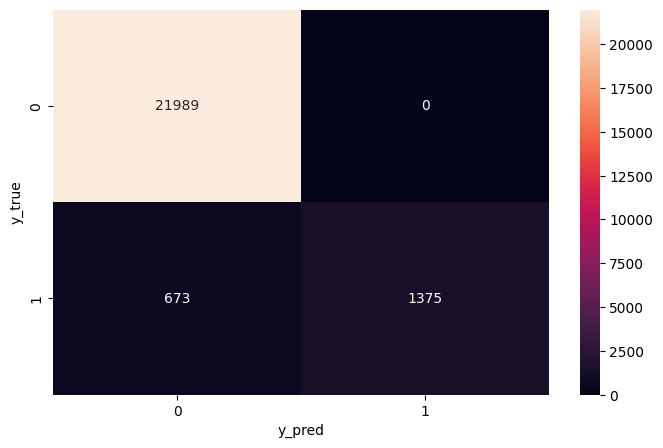

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Menampilkan classification report yang berisi precision, recall, f1-score, dan accuracy

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     21989
           1       1.00      0.67      0.80      2048

    accuracy                           0.97     24037
   macro avg       0.99      0.84      0.89     24037
weighted avg       0.97      0.97      0.97     24037



Visualisasi decision boundary dan data training

<ipython-input-105-4005999018>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


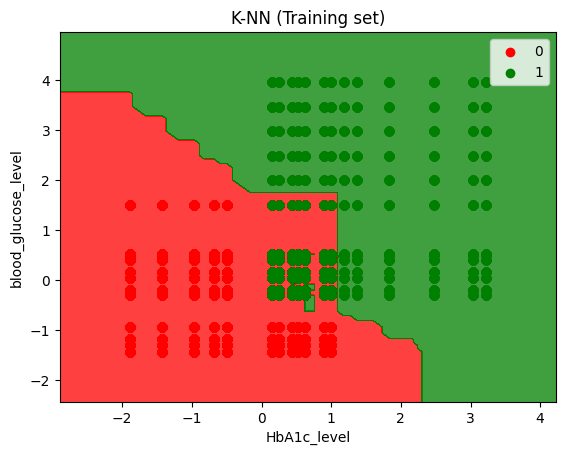

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('HbA1c_level')
plt.ylabel('blood_glucose_level')
plt.legend()
plt.show()

Visualisasi decision boundary dan hasil prediksi untuk data uji

<ipython-input-106-1382182304>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


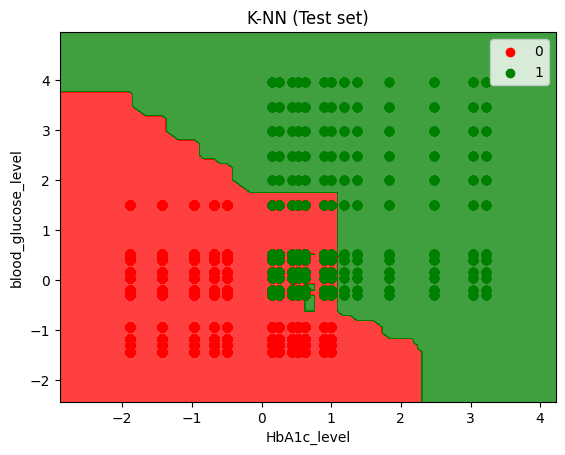

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('HbA1c_level')
plt.ylabel('blood_glucose_level')
plt.legend()
plt.show()